Link to DataSet. http://snap.stanford.edu/data/amazon0302.html


In [ ]:
import pandas as pd
import networkx as nx
import random 
# import matplotlib.pyplot as plt

##chosing real graph
# graph=nx.Graph()
df=pd.read_csv('/content/drive/MyDrive/amazon0302.txt',low_memory=False,header=3, sep='\t')
df=df.iloc[0:5000]
G = nx.from_pandas_edgelist(df, source="# FromNodeId", target="ToNodeId")
# nx.draw(G, pos=nx.spring_layout(G), node_size=0.2, width=0.25)

# graph = nx.from_pandas_edgelist(f,source="# FromNodeId",target="ToNodeId")
# nx.draw(G,pos=nx.spring_layout(G), node_size=0.2, width=0.25)
# print("Initial degree centralities of a random graph:",nx.degree_centrality(G))
# print("Initial betweenness centralities of a random graph:",nx.betweenness_centrality(G))
# print("Initial closeness centralities of a random graph:",nx.closeness_centrality(G))
# print("Initial diameter of a random graph:",nx.diameter(G))
# print("The clustering coefficients for node 0:",nx.clustering(G,0))
nx.info(G)

'Graph with 1761 nodes and 3894 edges'

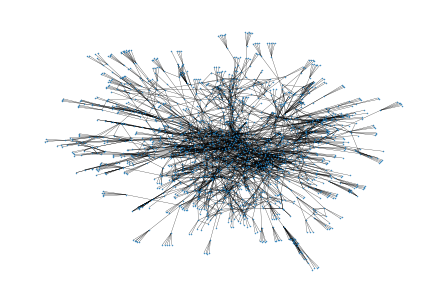

In [ ]:
nx.draw(G, pos=nx.spring_layout(G), node_size=0.2, width=0.25)

In [ ]:
import pandas as pd
import networkx as nx
import random 
import matplotlib.pyplot as plt

##chosing real graph
# graph=nx.Graph()
df=pd.read_csv('/content/drive/MyDrive/amazon0302.txt',low_memory=False,header=3, sep='\t')
df=df.iloc[0:100]
G = nx.from_pandas_edgelist(df, source="# FromNodeId", target="ToNodeId")
# nx.draw(G, pos=nx.spring_layout(G), node_size=0.2, width=0.25)

# graph = nx.from_pandas_edgelist(f,source="# FromNodeId",target="ToNodeId")
# nx.draw(G,pos=nx.spring_layout(G), node_size=0.2, width=0.25)
# print("Initial degree centralities of a random graph:",nx.degree_centrality(G))
# print("Initial betweenness centralities of a random graph:",nx.betweenness_centrality(G))
# print("Initial closeness centralities of a random graph:",nx.closeness_centrality(G))
# print("Initial diameter of a random graph:",nx.diameter(G))
# print("The clustering coefficients for node 0:",nx.clustering(G,0))
nx.info(G)

# nx.draw(G, pos=nx.spring_layout(G), node_size=0.2, width=0.25)


# Attacks on Real dataset
Diameter=[]
new_diameter = []
new_diameter1 =[ ]
new_size1=[]
new_size = []
removed_nodes = 0
removed_nodelist=[]

def GraphPlot(new_Values, Label):

  plt.figure()
  plt.grid(True)
  plt.plot(removed_nodelist, new_Values, 'ro-')
  plt.ylabel(Label + 'of GC')
  plt.xlabel('Number of removed nodes')
  plt.title(Label + 'Distribution')
  plt.show()
  plt.close()

def diffAttacks(Orig_graph, attackType):
  
  graph=Orig_graph.copy()
  nnodes=nx.number_of_nodes(graph)
  # Gcc = sorted(nx.connected_components(graph), key=len, reverse=True)
  # Diameter=graph.subgraph(Gcc[0])
  Diameter=nx.diameter(Orig_graph)
  # print('diameter is :',Diameter)
  
  if attackType == 'RandomAttack':
      
    for i in range (20):
      
      ListOfNodes=nx.nodes(graph)
      sample=2 #Removing 50% of nodes
      try:
        
        random_sample=random.sample(ListOfNodes,sample)
        graph.remove_nodes_from(random_sample)
        number=nx.number_of_nodes(graph)
        # print('78') #for debugging only
        # Gcc = sorted(nx.connected_components(graph), key=len, reverse=True)
        # new_diameter1 = graph.subgraph(Gcc[0])
        new_diameter1=nx.diameter(graph)
        # print('new_di:',new_diameter1)
        # new_diam=nx.diameter(graph, e=None)  #from this block of line is not working 
        new_size1=nx.number_of_nodes(graph)
        # print('443')
        new_diameter.append(round((new_diameter1/Diameter),2))
        # print('new line')
        new_size.append(round((new_size1/nnodes),2))
        removed_nodes=nnodes-new_size1
        removed_nodelist.append(round((new_size1/nnodes),2))
        nx.draw(graph, pos=nx.spring_layout(graph), node_size=0.2, width=0.25)
        nx.info(graph)
        nx.is_connected(graph)
        

      except:
        return

  elif attackType=='DegreeAttack':

    for i in range(5):

      Nodes=sorted(graph.degree,key=lambda x:x[1], reverse= True)[:8]
      remove_nodes=[i[0] for i in Nodes]
      graph.remove_nodes_from(remove_nodes)
      graph=graph.copy()
      NumberOfNodes=nx.number_of_nodes(graph)
      new_diameter1=nx.diameter(graph)
      new_size1=nx.number_of_nodes(graph)
      new_diameter.append(round((new_diameter1/Diameter),2))
      new_size.append(round((new_size1/nnodes),2))
      removed_nodes=nnodes-new_size1
      removed_nodelist.append(round((new_size1/nnodes),2))
      nx.draw(graph, pos=nx.spring_layout(graph), node_size=0.2, width=0.25)

      

        

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.17]
[0.97, 0.93, 0.9, 0.87, 0.84, 0.8, 0.77]


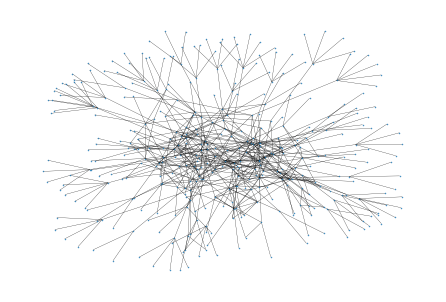

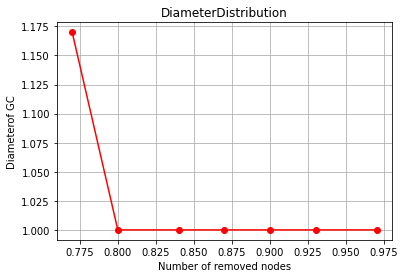

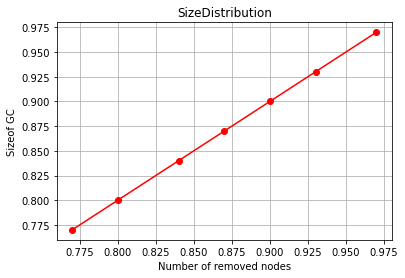

In [ ]:
diffAttacks(G,'RandomAttack')
print(new_diameter)
print(new_size)
GraphPlot(new_diameter,'Diameter')
GraphPlot(new_size,'Size')    

In [ ]:
diffAttacks(G,'DegreeAttack')
print(new_diameter)
print(new_size)
GraphPlot(new_diameter,'Diameter')
GraphPlot(new_size,'Size')    

NetworkXError: ignored